In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
train = pd.read_csv('train.csv')

In [3]:
train

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S
...,...,...,...,...,...,...,...,...,...,...,...,...
886,887,0,2,"Montvila, Rev. Juozas",male,27.0,0,0,211536,13.0000,NaN,S
887,888,1,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,112053,30.0000,B42,S
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,NaN,1,2,W./C. 6607,23.4500,NaN,S
889,890,1,1,"Behr, Mr. Karl Howell",male,26.0,0,0,111369,30.0000,C148,C


In [4]:
train.drop('PassengerId',axis=1,inplace=True)

In [5]:
print(train.isnull().sum().sort_values(ascending=False))

Cabin       687
Age         177
Embarked      2
Survived      0
Pclass        0
Name          0
Sex           0
SibSp         0
Parch         0
Ticket        0
Fare          0
dtype: int64


In [6]:
Cabin_mode=train.Cabin.mode()[0]
print(Cabin_mode)
train.Cabin.fillna(Cabin_mode,inplace=True)

B96 B98


In [7]:
print(train.isnull().sum().sort_values(ascending=False))

Age         177
Embarked      2
Survived      0
Pclass        0
Name          0
Sex           0
SibSp         0
Parch         0
Ticket        0
Fare          0
Cabin         0
dtype: int64


In [8]:
train=train[~train.Embarked.isnull()].copy()

In [9]:
Age_mode=train.Age.mode()[0]
print(Age_mode)
train.Age.fillna(Age_mode,inplace=True)

24.0


In [10]:
print(train.isnull().sum().sort_values(ascending=False))

Survived    0
Pclass      0
Name        0
Sex         0
Age         0
SibSp       0
Parch       0
Ticket      0
Fare        0
Cabin       0
Embarked    0
dtype: int64


In [11]:
train.describe()

,Survived,Pclass,Age,SibSp,Parch,Fare
count,889.000000,889.000000,889.000000,889.000000,889.000000,889.000000
mean,0.382452,2.311586,28.518751,0.524184,0.382452,32.096681
std,0.486260,0.834700,13.162820,1.103705,0.806761,49.697504
min,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,0.000000,2.000000,22.000000,0.000000,0.000000,7.895800
50%,0.000000,3.000000,24.000000,0.000000,0.000000,14.454200
75%,1.000000,3.000000,35.000000,1.000000,0.000000,31.000000
max,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


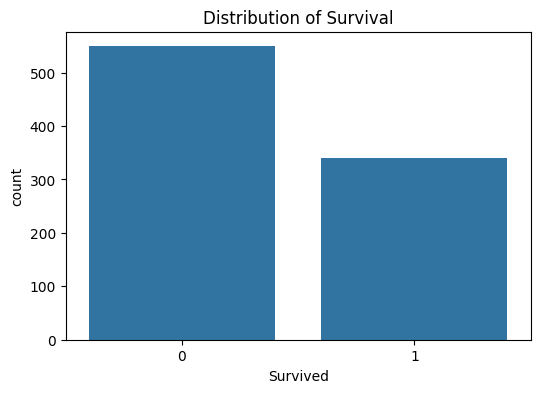

In [12]:
plt.figure(figsize=(6, 4))
sns.countplot(x='Survived', data=train)
plt.title('Distribution of Survival')
plt.show()

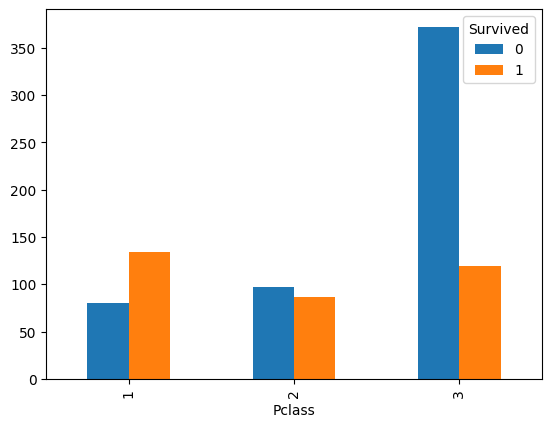

In [13]:
counts = train.groupby(['Pclass', 'Survived']).size().unstack()
counts.plot(kind="bar")
plt.show()

In [14]:
train['AgeGroup'] = pd.cut(train['Age'], bins=[0, 18, 30, 50, 100], labels=['Child', 'Young Adult', 'Adult', 'Senior'])
survival_by_agegroup = train.groupby('AgeGroup')['Survived'].mean()
print(survival_by_agegroup)

AgeGroup
Child          0.503597
Young Adult    0.331096
Adult          0.420833
Senior         0.333333
Name: Survived, dtype: float64


C:\Users\supri\AppData\Local\Temp\ipykernel_296\3810352891.py:2: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  survival_by_agegroup = train.groupby('AgeGroup')['Survived'].mean()


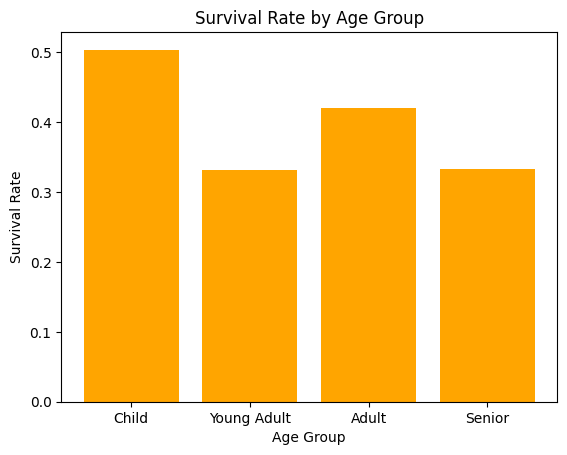

In [15]:
plt.bar(survival_by_agegroup.index, survival_by_agegroup.values,color="orange")
plt.xlabel('Age Group')
plt.ylabel('Survival Rate')
plt.title('Survival Rate by Age Group')
plt.show()

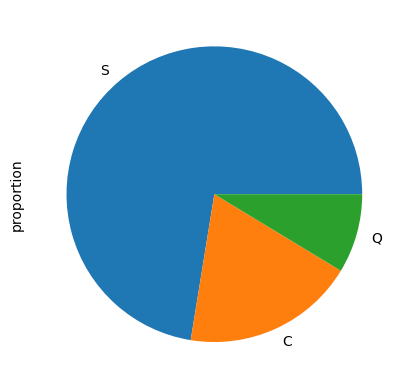

In [16]:
train.Embarked.value_counts(normalize=True)
train.Embarked.value_counts(normalize=True).plot.pie()
plt.show()

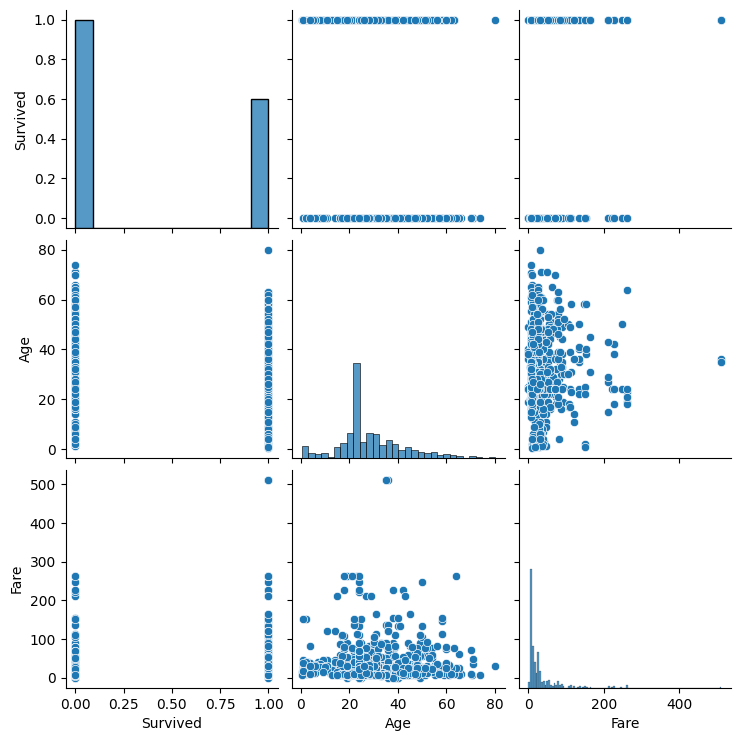

In [17]:
sns.pairplot(data=train,vars=['Survived','Age','Fare'])
plt.show()

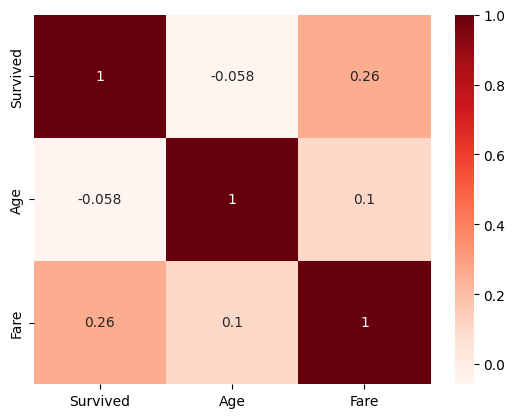

In [18]:
train[['Survived','Age','Fare']].corr()
sns.heatmap(train[['Survived','Age','Fare']].corr(),annot=True,cmap='Reds')
plt.show()

In [19]:
print(train.groupby('Survived')['Fare'].mean())

Survived
0    22.117887
1    48.209498
Name: Fare, dtype: float64


In [20]:
print(train.groupby('Survived')['Fare'].median())

Survived
0    10.5
1    26.0
Name: Fare, dtype: float64
